# Name - Kunal Khade


Project is based on classification of objects from given training data set. and cross verify it with test images. 
  

# First stage - Compute eign space local and global vectored image (lower dimension) 

The first stage is based on computing the eign images. convert images into vector. combine each image vector with each other. generate local image vectors consist of 128 single object image with different orientation. compute SVD of each image and lower down their dimensions using sigma matrix. For different images sigma value will be different. Sigma is decided based on eign values. Eign values which are greater than 0.1. all index before that considered. For example in boat dataset initial 13 eign values considered, whereas for the cabinet it is 10 and 18 for the chair. please check the table below. with matrix, U eignimages computed please check below. stick all image vectors with each other and generate a local vectored image. Computed the same for all different images and generate a global vector space.
#note - For 20 different images, my computer took more than 7 minutes to process. I reduced down to 10 images.

                                 Table for eign value calculation (Manually)
 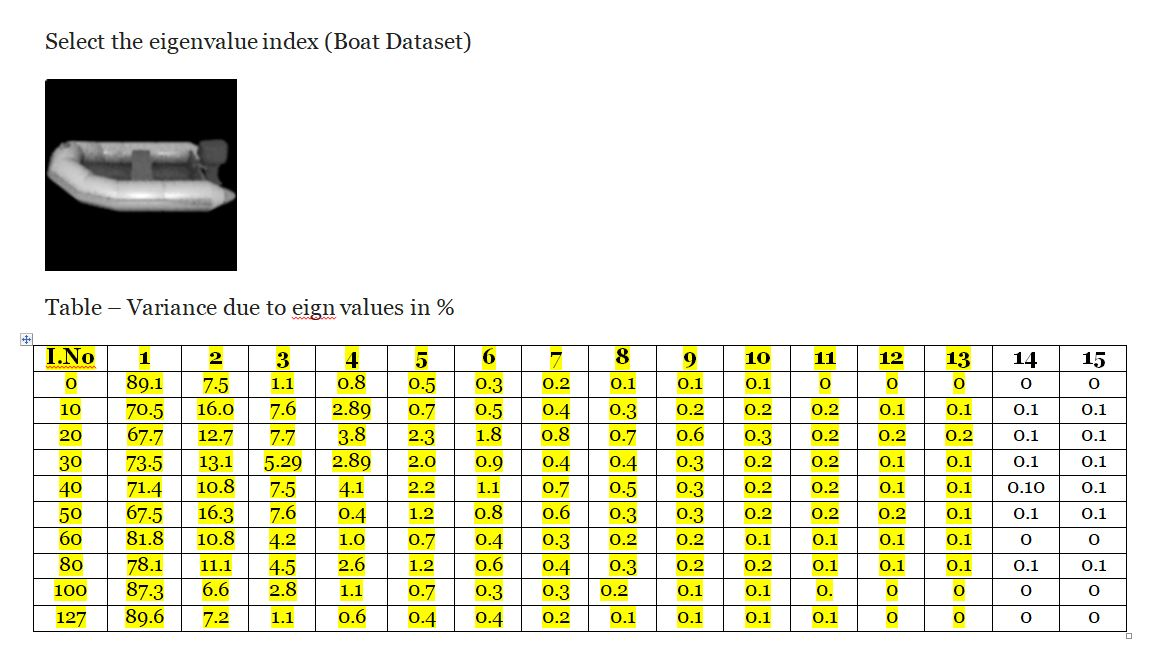
 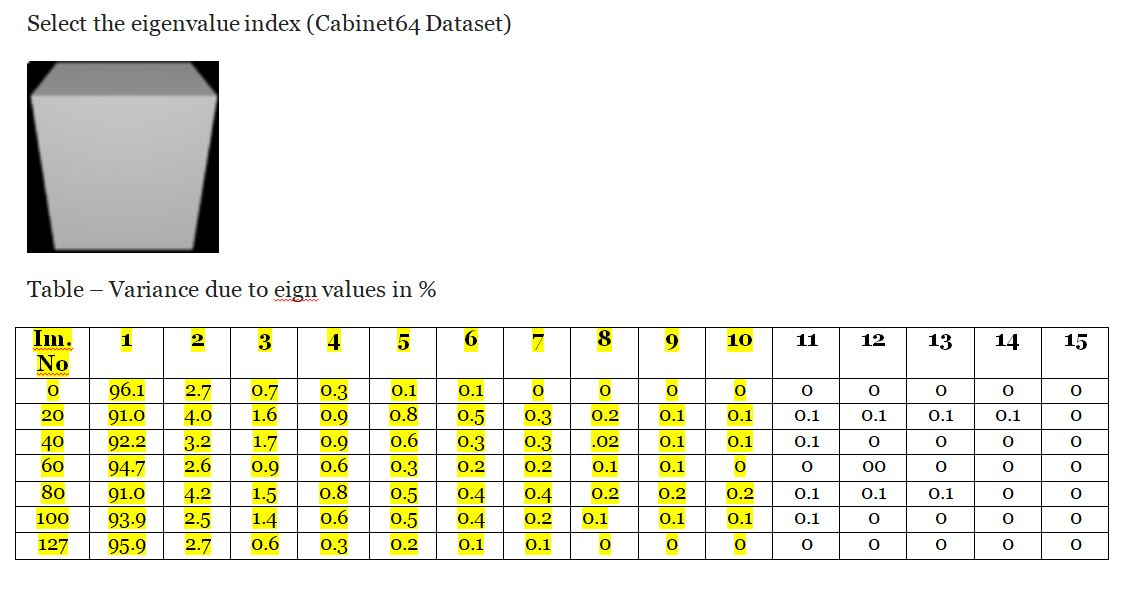
 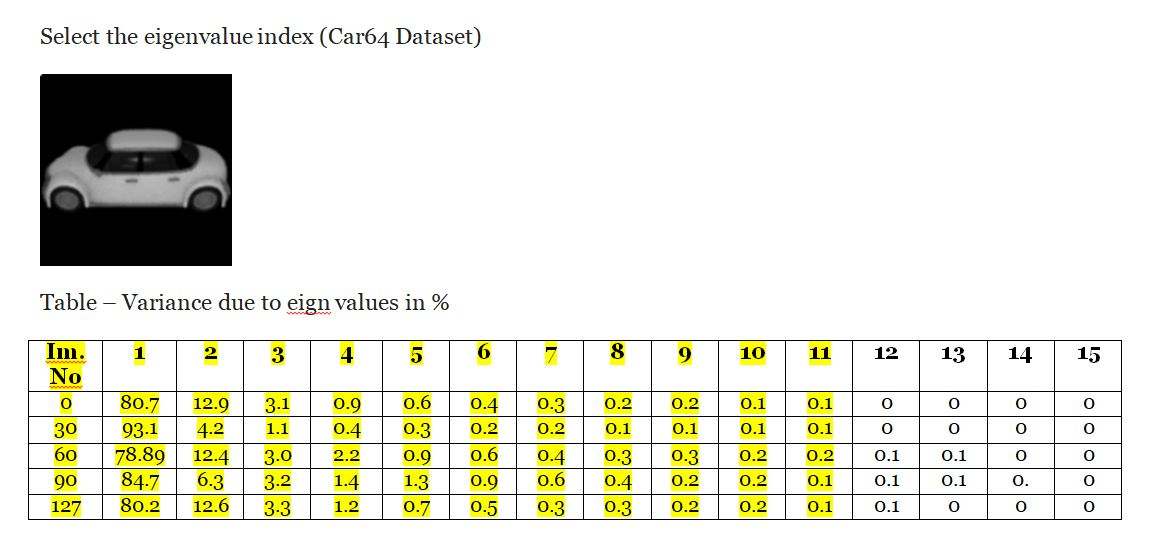
 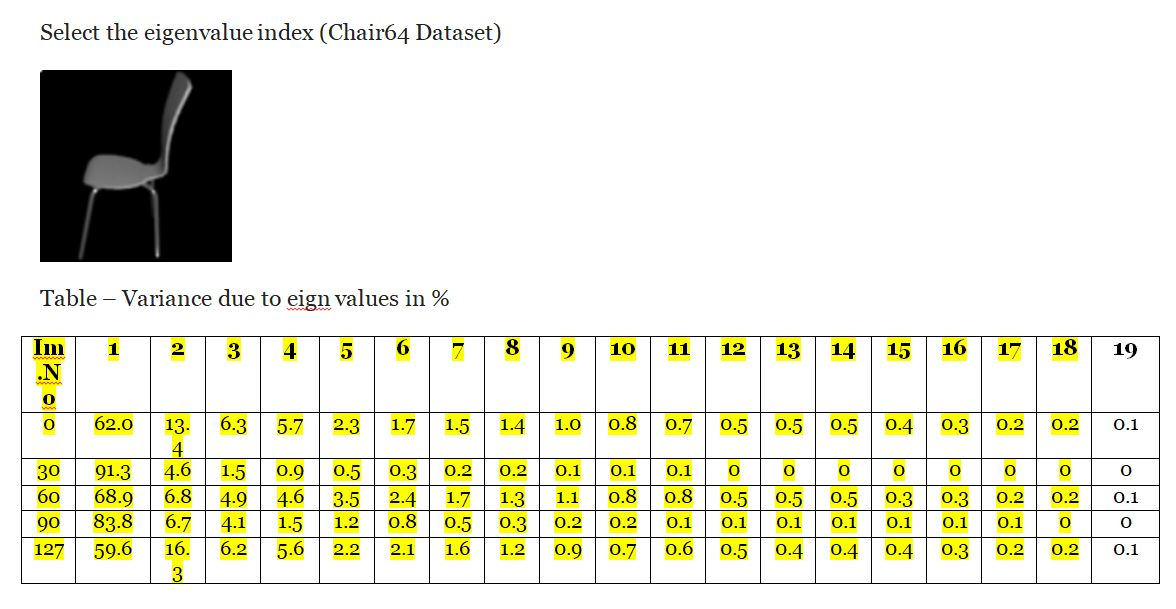
 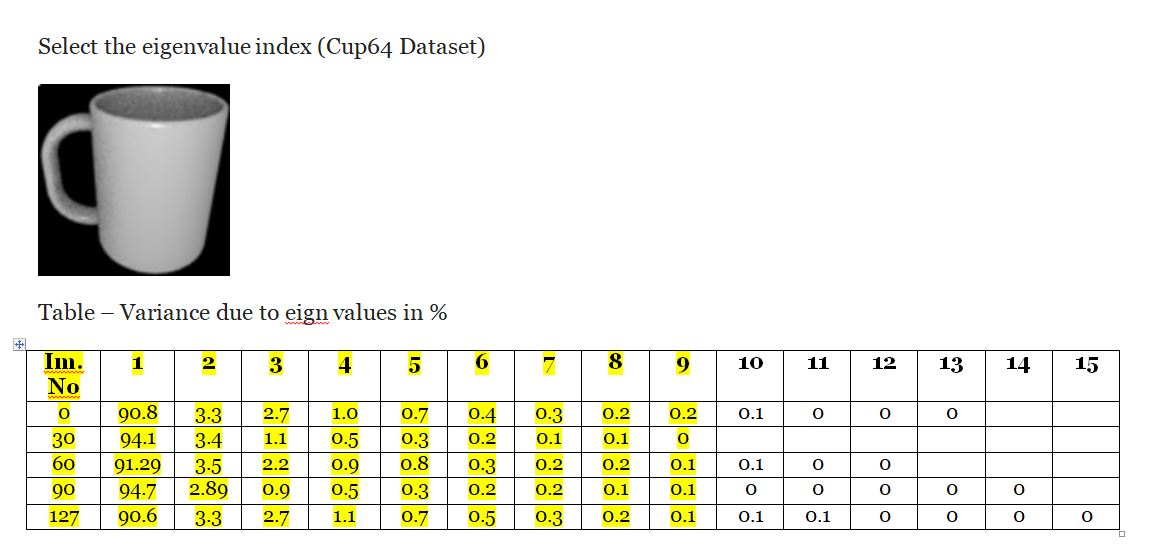
 

# Program No 1 - Eign images display 

After computing SVD. normalize U matrix and display. 

In [1]:
import glob
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
from scipy import linalg
import skimage 
from skimage import io
from skimage import data
np.set_printoptions(threshold=np.inf)
%matplotlib inline 

path_boat = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Car64\UnProcessed\*.png")
Image = cv2.imread("SA.png",0)

#Blank array for boat images
Boat = []
#Eign Images Approximation with each image set 
Boat_image_eigen_index = 13
Object_Number = 5

dim = 128 #Dimension
X = np.zeros((128**2,0))

#generate Vector
for img in path_boat:
		n = io.imread(img)
		n = skimage.img_as_float32(n).reshape(dim**2, 1)
		X = np.hstack((X,n))

new = X[:,Object_Number].reshape((128,128))
U,S,Vt = linalg.svd(X, full_matrices = False)
Eign_Image = U[:,Object_Number].reshape(128,128)
Eign_Image_Formatted = abs(Eign_Image * 255.0)

verticalAppendedImg = np.vstack((new,Eign_Image_Formatted))
cv2.imshow("X", verticalAppendedImg)
cv2.waitKey(0)


-1

                                                Eign images of different objects 
            Boat - 
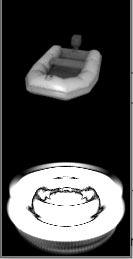
             Cabinate
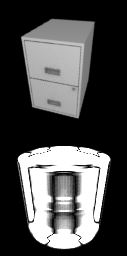
                Chair 
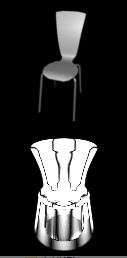
Car 
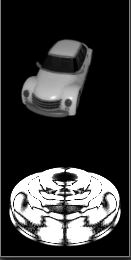
Torch
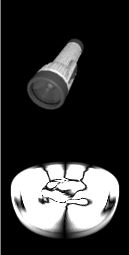
Door handle
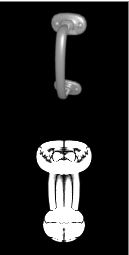
Machine
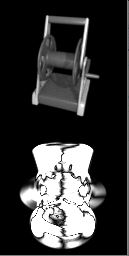
Macbook 
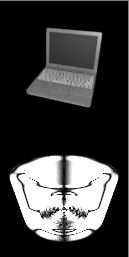
Imac 
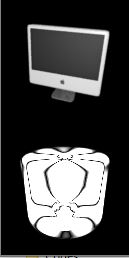
KeyBoard 
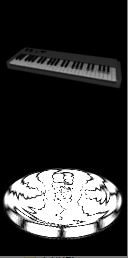

# Program No 2 - Display image vector point in low dimensional space


Plot point of image vector in low dimensional space in 3d space. 

(16384, 129)


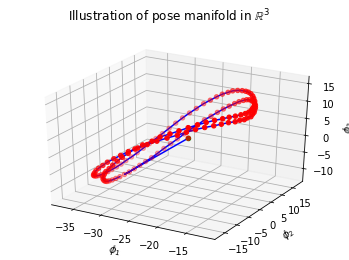

In [2]:

import skimage #scikit-learn image manipulation #
from skimage import io
from skimage import data
import matplotlib.pyplot as plt #plot utilities #
import numpy as np #numerical computations #
from mpl_toolkits import mplot3d
import cv2
import scipy 
from scipy import linalg
%matplotlib inline 

n = 128
X = np.zeros((128**2,0))
q = 0
for i in range(n):

    Img = io.imread(r'C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Flashlight64\UnProcessed\img_' + str(i) + '.png', as_gray = True)
    Img = skimage.img_as_float32(Img).reshape(n**2,1)
    X = np.hstack((X,Img))

Img_new = io.imread(r'C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TestImages\TestImages\Boat32\UnProcessed\img_10.png', as_gray = True)
Img_new = skimage.img_as_float32(Img_new).reshape(n**2,1)
X = np.hstack((X, Img_new))

U,S,Vt = linalg.svd(X, full_matrices = False)
reconstruction = np.matrix(U[:,:40])*np.diag(S[:40])*np.matrix(Vt[:40,:])

print(np.shape(X))

k = 5 #subspace dimension for visualization
M = U[:,0:k].T@X 

fig = plt.figure(3)
fig.suptitle('Illustration of pose manifold in $\mathbb{R}^3$')
ax = plt.axes(projection='3d')

ax.plot3D(M[0,], M[1,:], M[2,:],'blue')
ax.scatter3D(M[0,:], M[1,:], M[2,:],color='red')
ax.set_xlabel('$\phi_1$')
ax.set_ylabel('$\phi_2$')
ax.set_zlabel('$\phi_3$')
ax.scatter3D(M[0,-1], M[1,-1], M[2,-1],color='green')

plt.show()




3d Plot of the image  

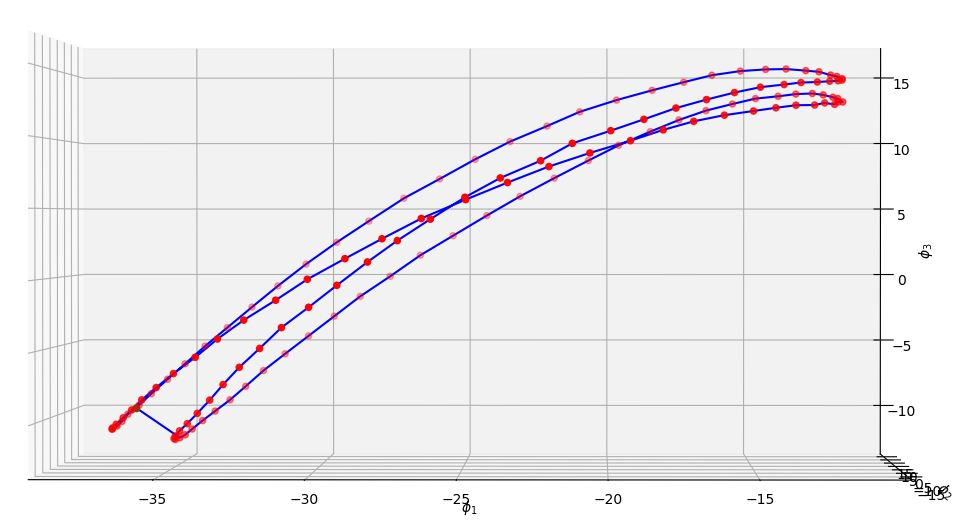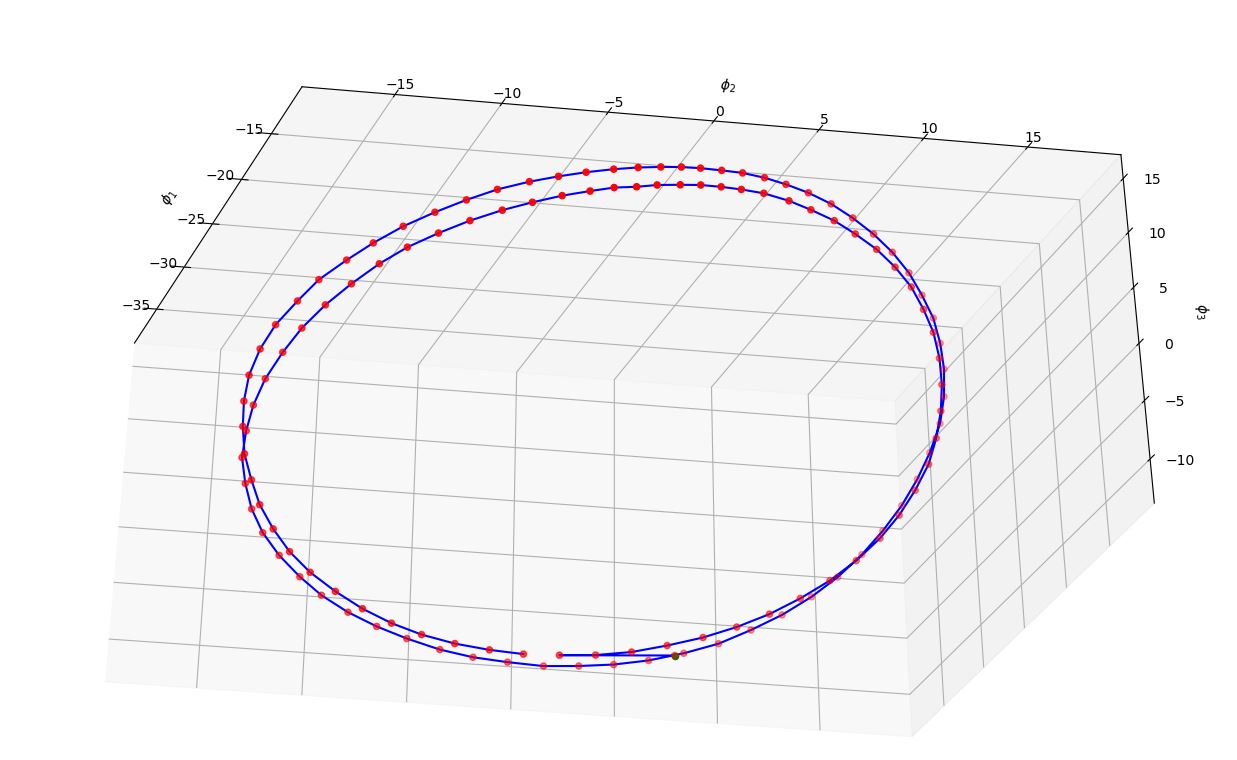

# Second stage - Compute appropriate subspace dimensions

In this section, we need to compute how much energy subspace can recover. Depending on the dimension of subspace it can reconstruct the original image but it will be less in dimensions. 
Energy Recovery Function which mentioned section 2 of the project. 

# Program No 3 - Compute the number of eign values required for specific energy. 

Compute the number of singular values required to reconstruct the image. Energy function decide reconstruction rate on the basis of 0-1 float values. In the below example I have set 0.95 and it provides the first 29 eign values.

In [8]:
import glob
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
from scipy import linalg
import skimage #scikit-learn image manipulation #
from skimage import io
from skimage import data
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from numpy import linalg as LA
np.set_printoptions(threshold=np.inf)

k = 0.98
path_boat_train = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Boat64\UnProcessed\*.png")
path_cabinet_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Cabinet64\UnProcessed\*.png")
path_car_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Car64\UnProcessed\*.png")
path_chair_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Chair64\UnProcessed\*.png")
path_cup_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Cup64\UnProcessed\*.png")
path_flashlight_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Flashlight64\UnProcessed\*.png")
path_handle_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Handle64\UnProcessed\*.png")
path_housereel_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\HoseReel64\UnProcessed\*.png")
path_ibook_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\ibook0164\UnProcessed\*.png")
path_imac1_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\imac0464\UnProcessed\*.png")



def clear():
	img = 0 
	n = 0

def image_vector_convert_local_without_SVD():
	
	dim = 128 #Dimension
	X1 = np.zeros((128**2,0))
	X2 = np.zeros((128**2,0))
	X3 = np.zeros((128**2,0))
	X4 = np.zeros((128**2,0))
	X5 = np.zeros((128**2,0))
	X6 = np.zeros((128**2,0))
	X7 = np.zeros((128**2,0))
	X8 = np.zeros((128**2,0))
	X9 = np.zeros((128**2,0))
	X10 = np.zeros((128**2,0))

	for img in path_boat_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X1 = np.hstack((X1,n))
	clear()
	for img in path_cabinet_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X2 = np.hstack((X2,n))
	clear()
	for img in path_car_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X3 = np.hstack((X3,n))
	clear()
	for img in path_chair_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X4 = np.hstack((X4,n))
	clear()
	for img in path_cup_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X5 = np.hstack((X5,n))
	clear()
	for img in path_flashlight_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X6 = np.hstack((X6,n))
	clear()
	for img in path_handle_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X7 = np.hstack((X7,n))
	clear()
	for img in path_housereel_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X8 = np.hstack((X8,n))
	clear()
	for img in path_ibook_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X9 = np.hstack((X9,n))
	clear()
	for img in path_imac1_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X10 = np.hstack((X10,n))
	clear()
	return X1, X2, X3, X4, X5, X6, X7, X8, X9, X10

boat_vect = []
cabinate_vect = [] 
car_vect = []
chair_vect = [] 
cup_vect = []
flashlight_vect = []
handle_vect = []
housereel_vect = []
ibook_vect = []
imac_vect = []

boat_vect, cabinate_vect, car_vect, chair_vect, cup_vect, flashlight_vect, handle_vect, housereel_vect, ibook_vect, imac_vect = image_vector_convert_local_without_SVD()

def Energy_recovery_ratio(X, k):
        
    Norm_matrix = LA.norm(X)
    U,S,Vt = linalg.svd(X, full_matrices = False)
   # print(Norm_matrix)
   # print(S)
    temp2 = 0
    for sigma in range(len(S)):
        temp2 = np.sum(S[0:sigma]**2)
        if temp2 >= ((Norm_matrix **2)* k):
            break
    return sigma

Subspace_dimension = Energy_recovery_ratio(imac_vect, k)
print("Eign Values required to get respective energy - ",Subspace_dimension)


Eign Values required to get respective energy -  29


# Formula mentioned in description 


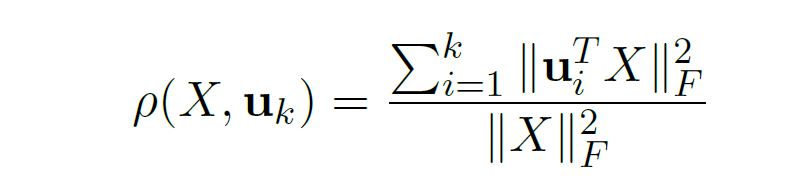


#  Eign value table generated from this formula 



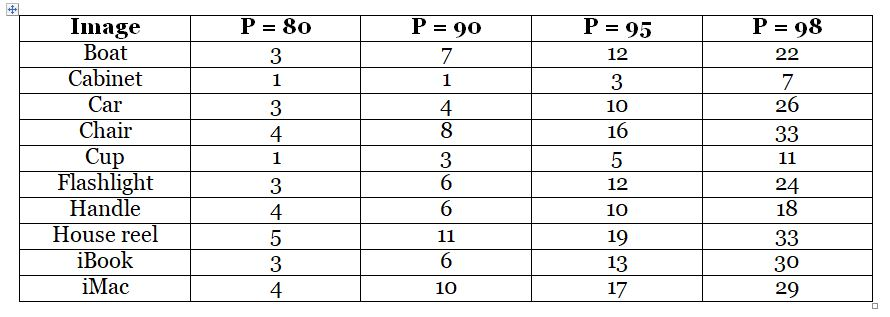

Conclusion - The energy function lies between 0-1. More eign values required in order to get a more accurate result. But it also depends on what is the need of the system. And how accuracy and precision are needed in order to get that result. 



# Third stage - Object Classification 

In the previous two sections, we computed two different approaches in order to classify the objects given by user. The first approach is a manual approach in which a number of eign values were decided by the user by the manual testing method. But in the second method is completely dependent on automatic eign values selection in order to get eh better result. K factor decides how to value users required for perfect detection.  

Entire Code  

Conclusion - .85 amount of energy is needed in order to detect the exact classification of the test image with respect to training images.


# Program No 4 - complete code with user selection mode. 

In [6]:
#Author - Kunal Khade
#Project3 - Computer vision - Statistical Pattern Recognition
#Professor - Dr.Hoover

import math 
import glob
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
from scipy import linalg
import skimage #scikit-learn image manipulation #
from skimage import io
from skimage import data
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from numpy import linalg as LA
np.set_printoptions(threshold=np.inf)

K = 0.95
Boat_eig_Index = 13
Cabinate_eig_Index = 10
Car_eig_Index = 11
Chair_eig_Index = 18
Cup_eig_Index = 9
Flashlight_eig_Index = 7
Handle_eig_Index = 9
Housereel_eig_Index = 14
Ibook_eig_Index = 12
Imac_eig_Index = 9


#Read angles from text file 
with open(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TestImages\TestImages\RandAng.txt") as f:
    for line in f:
        angle_data = line.split(',')
#print(angle_data)        

path_boat_train = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Boat64\UnProcessed\*.png")
path_cabinet_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Cabinet64\UnProcessed\*.png")
path_car_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Car64\UnProcessed\*.png")
path_chair_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Chair64\UnProcessed\*.png")
path_cup_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Cup64\UnProcessed\*.png")
path_flashlight_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Flashlight64\UnProcessed\*.png")
path_handle_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\Handle64\UnProcessed\*.png")
path_housereel_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\HoseReel64\UnProcessed\*.png")
path_ibook_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\ibook0164\UnProcessed\*.png")
path_imac1_train  = glob.glob(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TrainingImages\TrainingImages\imac0464\UnProcessed\*.png")
#print(path_boat_train)

Boat = cv2.imread(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\Supporting Images\boat.jpg",0)
Cabinate = cv2.imread(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\Supporting Images\Cabinate.jpg",0)
Car = cv2.imread(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\Supporting Images\Car.jpg",0)
Chair = cv2.imread(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\Supporting Images\Chair.jpg",0)
Cup = cv2.imread(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\Supporting Images\Cup.jpg",0)
Flashlight = cv2.imread(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\Supporting Images\Flashlight.jpg",0)
Handle = cv2.imread(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\Supporting Images\Handle.jpg",0)
Housereel = cv2.imread(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\Supporting Images\Housereel.jpg",0)
Ibook = cv2.imread(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\Supporting Images\Ibook.jpg",0)
Imac = cv2.imread(r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\Supporting Images\Imac.jpg",0)

path_boat_test = (r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TestImages\TestImages\Boat32\UnProcessed\img_")
path_cabinet_test = (r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TestImages\TestImages\Cabinet32\UnProcessed\img_")
path_car_test = (r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TestImages\TestImages\Car32\UnProcessed\img_")
path_chair_test = (r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TestImages\TestImages\Chair32\UnProcessed\img_")
path_cup_test = (r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TestImages\TestImages\Cup32\UnProcessed\img_")
path_flashlight_test = (r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TestImages\TestImages\Flashlight32\UnProcessed\img_")
path_handle_test = (r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TestImages\TestImages\Handle32\UnProcessed\img_")
path_housereel_test = (r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TestImages\TestImages\HoseReel32\UnProcessed\img_")
path_ibook_test = (r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TestImages\TestImages\ibook0132\UnProcessed\img_")
path_imac1_test = (r"C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TestImages\TestImages\imac0432\UnProcessed\img_")

sub_images = [path_boat_test, path_cabinet_test, path_car_test, path_chair_test, path_cup_test, path_flashlight_test, path_handle_test, path_housereel_test, path_ibook_test, path_imac1_test]
Images = [Boat,Cabinate, Car, Chair, Cup, Flashlight, Handle, Housereel, Ibook, Imac]

#initialize black lists     
boat_vect = []
cabinate_vect = [] 
car_vect = []
chair_vect = [] 
cup_vect = []
flashlight_vect = []
handle_vect = []
housereel_vect = []
ibook_vect = []
imac_vect = []

def user_input():
    #Parameters - No Parameters 
    #Take User inputs for image selection and sub image slection
    #Return - return selected sub-image and vectored image
    
    Selected_Object = 0
    Object_by_user = 0
    sub_object_by_user = 0

    print("Select Your Favourite Object - 0.Boat 1.Cabinate 2.Car 3.Chair 4.Cup 5.Flashlight 6.Handle 7.Housereel 8.Ibook 9.Imac \nType Number (click on image and press ESC)")
    Selected_Object = int(input())

    cv2.imshow("Input_Images_Choice \n ", Images[Selected_Object])
    cv2.waitKey(0) 
    cv2.destroyAllWindows()
    Object_by_user = sub_images[Selected_Object]

    print("Select Your Favourite Subimage \nType Number ")
    new = input()
    Sub_Image_Input = Object_by_user + new + '.png'
    print("path = ",Sub_Image_Input)
    
    Input_image = cv2.imread(Sub_Image_Input,0)          
    New_Image = skimage.img_as_float32(Input_image).flatten()
    return New_Image, Input_image, int(new), Selected_Object
def clear():
    #clear Matrix and other parameters
	img = 0 
	n = 0

def image_vector_convert_local_without_SVD():
        #Parameters - No Parameters 
        #Take individual images from teh provided path
        #Convert each image into vectored form and generate 16384,128 Vectored Image Space
        #Which is also called local vectored space.
        #Return - All image vectores X1-X10
	
	dim = 128 #Dimension
	X1 = np.zeros((128**2,0))
	X2 = np.zeros((128**2,0))
	X3 = np.zeros((128**2,0))
	X4 = np.zeros((128**2,0))
	X5 = np.zeros((128**2,0))
	X6 = np.zeros((128**2,0))
	X7 = np.zeros((128**2,0))
	X8 = np.zeros((128**2,0))
	X9 = np.zeros((128**2,0))
	X10 = np.zeros((128**2,0))

	for img in path_boat_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X1 = np.hstack((X1,n))
	clear()
	for img in path_cabinet_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X2 = np.hstack((X2,n))
	clear()
	for img in path_car_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X3 = np.hstack((X3,n))
	clear()
	for img in path_chair_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X4 = np.hstack((X4,n))
	clear()
	for img in path_cup_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X5 = np.hstack((X5,n))
	clear()
	for img in path_flashlight_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X6 = np.hstack((X6,n))
	clear()
	for img in path_handle_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X7 = np.hstack((X7,n))
	clear()
	for img in path_housereel_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X8 = np.hstack((X8,n))
	clear()
	for img in path_ibook_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X9 = np.hstack((X9,n))
	clear()
	for img in path_imac1_train:
			n = io.imread(img)
			n = skimage.img_as_float32(n).reshape(dim**2, 1)
			X10 = np.hstack((X10,n))
	clear()
	return X1, X2, X3, X4, X5, X6, X7, X8, X9, X10
    


def Energy_recovery_ratio(X, k):
        
    Norm_matrix = LA.norm(X)
    U,S,Vt = linalg.svd(X, full_matrices = False)
   # print(Norm_matrix)
   # print(S)
    temp2 = 0
    for sigma in range(len(S)):
        temp2 = np.sum(S[0:sigma]**2)
        if temp2 >= ((Norm_matrix **2)* k):
            break
    return sigma
#Subspace_dimension = Energy_recovery_ratio(imac_vect, 0.98)

def image_vector_convert_local_with_SVD(Index):
        #Parameters - No Parameters 
        #Take individual vectored image 
        #Convert each image into normalized form and generate SVD. 
        #Lowerdown the dimension and reconstruct the image
        #Make Stack of all imagesin to single matrix
        #Return - All image vectores X1-X10

	X1 = np.zeros((128**2,0))
	X2 = np.zeros((128**2,0))
	X3 = np.zeros((128**2,0))
	X4 = np.zeros((128**2,0))
	X5 = np.zeros((128**2,0))
	X6 = np.zeros((128**2,0))
	X7 = np.zeros((128**2,0))
	X8 = np.zeros((128**2,0))
	X9 = np.zeros((128**2,0))
	X10 = np.zeros((128**2,0))
	
	for dis in range(128):
			new = boat_vect[:,dis].reshape((128,128))
			U,S0,Vt = linalg.svd(new, full_matrices = False)
			reconstruction = np.matrix(U[:,:Index])*np.diag(S0[:Index])*np.matrix(Vt[:Index,:])
			new = skimage.img_as_float32(reconstruction).reshape(dim**2, 1)
			X1 = np.hstack((X1,new))
	dis = 0
	for dis in range(128):
			new = cabinate_vect[:,dis].reshape((128,128))
			U,S,Vt = linalg.svd(new, full_matrices = False)
			reconstruction = np.matrix(U[:,:Index])*np.diag(S[:Index])*np.matrix(Vt[:Index,:])
			new = skimage.img_as_float32(reconstruction).reshape(dim**2, 1)
			X2 = np.hstack((X2,new))		
	dis = 0
	for dis in range(128):
			new = car_vect[:,dis].reshape((128,128))
			U,S,Vt = linalg.svd(new, full_matrices = False)
			reconstruction = np.matrix(U[:,:Index])*np.diag(S[:Index])*np.matrix(Vt[:Index,:])
			new = skimage.img_as_float32(reconstruction).reshape(dim**2, 1)
			X3 = np.hstack((X3,new))
	dis = 0
	for dis in range(128):
			new = chair_vect[:,dis].reshape((128,128))
			U,S,Vt = linalg.svd(new, full_matrices = False)
			reconstruction = np.matrix(U[:,:Index])*np.diag(S[:Index])*np.matrix(Vt[:Index,:])
			new = skimage.img_as_float32(reconstruction).reshape(dim**2, 1)
			X4 = np.hstack((X4,new))		
	dis = 0
	for dis in range(128):
			new = cup_vect[:,dis].reshape((128,128))
			U,S,Vt = linalg.svd(new, full_matrices = False)
			reconstruction = np.matrix(U[:,:Index])*np.diag(S[:Index])*np.matrix(Vt[:Index,:])
			new = skimage.img_as_float32(reconstruction).reshape(dim**2, 1)
			X5 = np.hstack((X5,new))	
	dis = 0
	for dis in range(128):
			new = flashlight_vect[:,dis].reshape((128,128))
			U,S,Vt = linalg.svd(new, full_matrices = False)
			reconstruction = np.matrix(U[:,:Index])*np.diag(S[:Index])*np.matrix(Vt[:Index,:])
			new = skimage.img_as_float32(reconstruction).reshape(dim**2, 1)
			X6 = np.hstack((X6,new))
	dis = 0
	for dis in range(128):
			new = handle_vect[:,dis].reshape((128,128))
			U,S,Vt = linalg.svd(new, full_matrices = False)
			reconstruction = np.matrix(U[:,:Index])*np.diag(S[:Index])*np.matrix(Vt[:Index,:])
			new = skimage.img_as_float32(reconstruction).reshape(dim**2, 1)
			X7 = np.hstack((X7,new))	
	dis = 0
	for dis in range(128):
			new = housereel_vect[:,dis].reshape((128,128))
			U,S,Vt = linalg.svd(new, full_matrices = False)
			reconstruction = np.matrix(U[:,:Index])*np.diag(S[:Index])*np.matrix(Vt[:Index,:])
			new = skimage.img_as_float32(reconstruction).reshape(dim**2, 1)
			X8 = np.hstack((X8,new))	
	dis = 0
	for dis in range(128):
			new = ibook_vect[:,dis].reshape((128,128))
			U,S,Vt = linalg.svd(new, full_matrices = False)
			reconstruction = np.matrix(U[:,:Index])*np.diag(S[:Index])*np.matrix(Vt[:Index,:])
			new = skimage.img_as_float32(reconstruction).reshape(dim**2, 1)
			X9 = np.hstack((X9,new))
	dis = 0
	for dis in range(128):
			new = imac_vect[:,dis].reshape((128,128))
			U,S,Vt = linalg.svd(new, full_matrices = False)
			reconstruction = np.matrix(U[:,:Index])*np.diag(S[:Index])*np.matrix(Vt[:Index,:])
			new = skimage.img_as_float32(reconstruction).reshape(dim**2, 1)
			X10 = np.hstack((X10,new))
	dis = 0
	return X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, S0

def check_indexing(val):
    if val <= 128:
        return val
    elif 128 < val <= 256:
        return val - 128
    elif 256 < val <= 384:
        return val - 256
    elif 384 < val <= 512:
        return val - 384
    elif 512 < val <= 640:
        return val - 512
    elif 640 < val <= 768:
        return val - 640
    elif 768 < val <= 896:
        return val - 768
    elif 896 < val <= 1024: 
        return val - 896
    elif 1024 < val <= 1152:
        return val - 1024
    elif 1152 < val <= 1280:
        return val - 1152

Selected_Image_vect, Input_image, img_index, temp = user_input()
boat_vect, cabinate_vect, car_vect, chair_vect, cup_vect, flashlight_vect, handle_vect, housereel_vect, ibook_vect, imac_vect = image_vector_convert_local_without_SVD()
combine_vect = boat_vect, cabinate_vect,  car_vect, chair_vect, cup_vect, flashlight_vect, handle_vect, housereel_vect, ibook_vect, imac_vect 
 
Subspace_dimension = Energy_recovery_ratio(combine_vect[temp], K)
print("Energy Value numbers - ",float(Subspace_dimension))
dim = 128

#Boat_image_eigen_index = 13
X = np.zeros((128**2,0))
reconstruction = []
new = np.zeros((128,128))
dist_update = []

boat_vect1, cabinate_vect1, car_vect1, chair_vect1, cup_vect1, flashlight_vect1, handle_vect1, housereel_vect1, ibook_vect1, imac_vect1, sing_val = image_vector_convert_local_with_SVD(Subspace_dimension)
#Generate a global space
global_vector = np.concatenate((boat_vect1, cabinate_vect1, car_vect1, chair_vect1, cup_vect1, flashlight_vect1, handle_vect1, housereel_vect1, ibook_vect1, imac_vect1),axis=1)

im1_vect = car_vect[:,100] 

fil = []
	
dist_update = [] 
zeros = 0

#findout the norm and index of teh specific image into global space
for flag in range((1280)):
	fil = np.linalg.norm(Selected_Image_vect - global_vector[:,flag])
	dist_update.append(fil)

print("Waiting...")
min_update = np.min(dist_update)
for cnt in range(len(dist_update)):
	if min_update == dist_update[cnt]:
		zeros = cnt
		break

val = check_indexing(cnt)

def Calculate_Pose(CoLatitude, Longitude):
    constant = 2.8125 #128 Images for 360 Degree angle
    Longitude_angle = Longitude * constant
    CoLatitude_angle = angle_data[img_index]
    return CoLatitude_angle, Longitude_angle

Col_angle, Lon_angle = Calculate_Pose(img_index, val)

Lon_angle = math.radians(float(Lon_angle))
error = math.degrees(float(Lon_angle - (float(Col_angle)))) 
print("True Angle of selected image - ",Col_angle,"\nEstimated angle of classified image - ", Lon_angle, "\nError between these two values in degree - ",error)

print("cnt - ", cnt)

im2 = global_vector[:,cnt].reshape((128,128))
scale_percent = 250

width1 = int(im2.shape[1] * scale_percent / 100)
height1 = int(im2.shape[0] * scale_percent / 100)
dsize1 = (width1, height1)

width2 = int(Input_image.shape[1] * scale_percent / 100)
height2 = int(Input_image.shape[0] * scale_percent / 100)
dsize2 = (width2, height2)


output1 = cv2.resize(im2, dsize1)
output2 = cv2.resize(Input_image, dsize2)

font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(output2, Col_angle, (200,30), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(output2, "True Pose", (30,30), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

new_lon = str(Lon_angle)
cv2.putText(output1, "Est Pose", (30,30), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(output1, new_lon, (200,30), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

cv2.imshow("Classified_Image", output1)
cv2.imshow("User_Selected_Image", output2)
cv2.waitKey(0)
cv2.destroyAllWindows()



Select Your Favourite Object - 0.Boat 1.Cabinate 2.Car 3.Chair 4.Cup 5.Flashlight 6.Handle 7.Housereel 8.Ibook 9.Imac 
Type Number (click on image and press ESC)
0
Select Your Favourite Subimage 
Type Number 
21
path =  C:\Users\KUNAL\Desktop\Jupyter Notebook\Untitled Folder\TestImages\TestImages\Boat32\UnProcessed\img_21.png
Energy Value numbers -  12.0
Waiting...
True Angle of selected image -  1.1612 
Estimated angle of classified image -  1.1780972450961724 
Error between these two values in degree -  0.9681408294088059
cnt -  24


# .85 is the perfect energy value for identify all images given in data set 

Result 
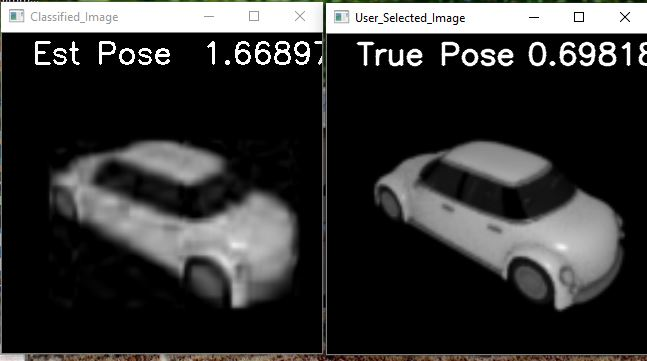

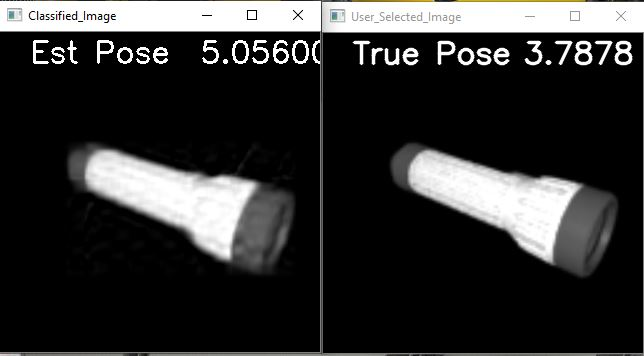



In [ ]:
#there is a small issues with indexing in pose estimation i am try to resolve it. If it worked then i will send updated zip
#thank you